In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft, interpolate
import math
from cmath import exp, pi
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [2]:
# iterative cooley tukey fft
def cooley_tukey_fft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if np.log2(N) % 1 > 0:
        raise ValueError("must be a power of 2")
        
    N_min = min(N, 2)
    
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0]) / X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd, X_even - terms * X_odd])
    
    return X.ravel()

# recursive iteration fft
def recursive_fft(x):
    N = len(x)
    if N <= 1: return x
    even = recursive_fft(x[0::2])
    odd =  recursive_fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

# read raw data
def read_data(filename):
    result = []  
    with open(filename,'r') as file:  
        csvReader=csv.reader(file)  
        for line in csvReader:
            result.append(float(line[0]))
    return result

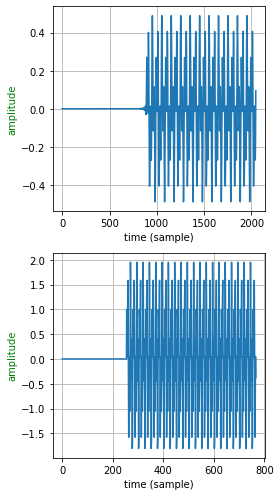

In [3]:
dataSet1 = read_data("Interpolation_Data/expectedinterpoutput2048.dat")
x_axis1 = np.arange(len(dataSet1))

dataSet2 = read_data("Interpolation_Data/indata512.dat")
x_axis2 = np.arange(len(dataSet2))

fig, axes = plt.subplots(2, 1, figsize=(4, 7))

axes[0].plot(x_axis1, dataSet1)
axes[0].set_xlabel('time (sample)')
axes[0].set_ylabel('amplitude', color='g')
axes[0].grid()

axes[1].plot(x_axis2, dataSet2)
axes[1].set_xlabel('time (sample)')
axes[1].set_ylabel('amplitude', color='g')
axes[1].grid()

plt.tight_layout()
plt.show()

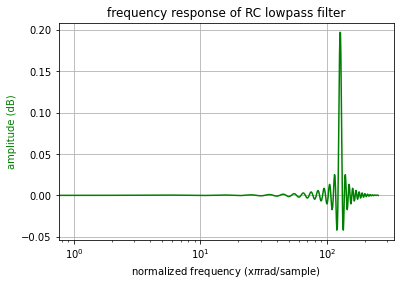

In [4]:
dataSet = read_data("Interpolation_Data/coeffs256.dat")
x_axis = np.arange(len(dataSet))

fig, ax1 = plt.subplots()

ax1.plot(x_axis, dataSet, 'g')
ax1.set_xlabel(r'normalized frequency (x$\pi$rad/sample)')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.grid()

plt.title('frequency response of RC lowpass filter')
plt.xscale("log")
plt.show()

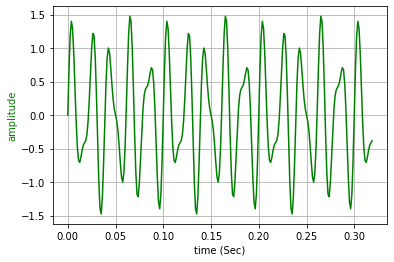

In [5]:
# Number of sample points
N = 256
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

fig, ax1 = plt.subplots()

ax1.plot(x, y, 'g')
ax1.set_xlabel(r'time (Sec)')
ax1.set_ylabel('amplitude', color='g')
ax1.grid()
plt.show()

C:\Users\Lava.kweiwen\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Lava.kweiwen\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


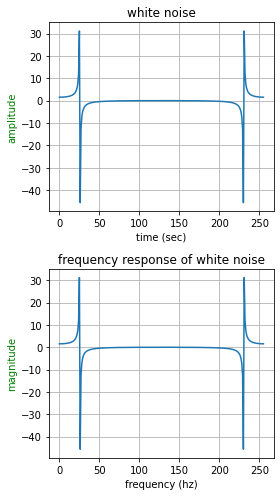

In [6]:
yy1 = recursive_fft(y)
yy1 = np.array(yy1)
xy1 = np.arange(len(yy1))
half = len(yy1) // 2

yy2 = cooley_tukey_fft(y)
xy2 = np.arange(len(yy2))
half = len(yy2) // 2

fig, axes = plt.subplots(2, 1, figsize=(4, 7))

axes[0].plot(xy1, yy1)
axes[0].set_xlabel('time (sec)')
axes[0].set_ylabel('amplitude', color='g')
axes[0].set_title('white noise')
axes[0].grid()

axes[1].plot(xy2, yy2)
axes[1].set_title('frequency response of white noise')
axes[1].set_xlabel('frequency (hz)')
axes[1].set_ylabel('magnitude', color='g')
axes[1].grid()

plt.tight_layout()
plt.show()

C:\Users\Lava.kweiwen\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


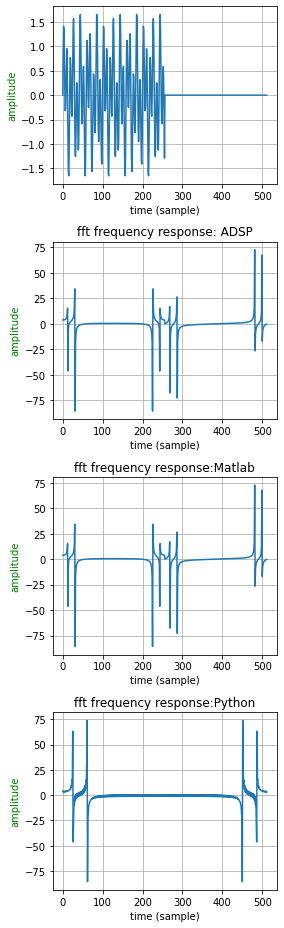

In [7]:
dataSet0 = read_data("FFT_Data/input512.dat")
x_axis0 = np.arange(len(dataSet0))

dataSet1 = read_data("FFT_Data/FFT512_ADSP.dat")
x_axis1 = np.arange(len(dataSet1))

dataSet2 = read_data("FFT_Data/FFT512_Matlab.dat")
x_axis2 = np.arange(len(dataSet2))

dataSet3 = cooley_tukey_fft(dataSet0)
x_axis3 = np.arange(len(dataSet3))

fig, axes = plt.subplots(4, 1, figsize=(4, 13))

axes[0].plot(x_axis0, dataSet0)
axes[0].set_xlabel('time (sample)')
axes[0].set_ylabel('amplitude', color='g')
axes[0].grid()

axes[1].plot(x_axis1, dataSet1)
axes[1].set_title('fft frequency response: ADSP')
axes[1].set_xlabel('time (sample)')
axes[1].set_ylabel('amplitude', color='g')
axes[1].grid()

axes[2].plot(x_axis2, dataSet2)
axes[2].set_title('fft frequency response:Matlab')
axes[2].set_xlabel('time (sample)')
axes[2].set_ylabel('amplitude', color='g')
axes[2].grid()

axes[3].plot(x_axis3, dataSet3)
axes[3].set_title('fft frequency response:Python')
axes[3].set_xlabel('time (sample)')
axes[3].set_ylabel('amplitude', color='g')
axes[3].grid()

plt.tight_layout()
plt.show()

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

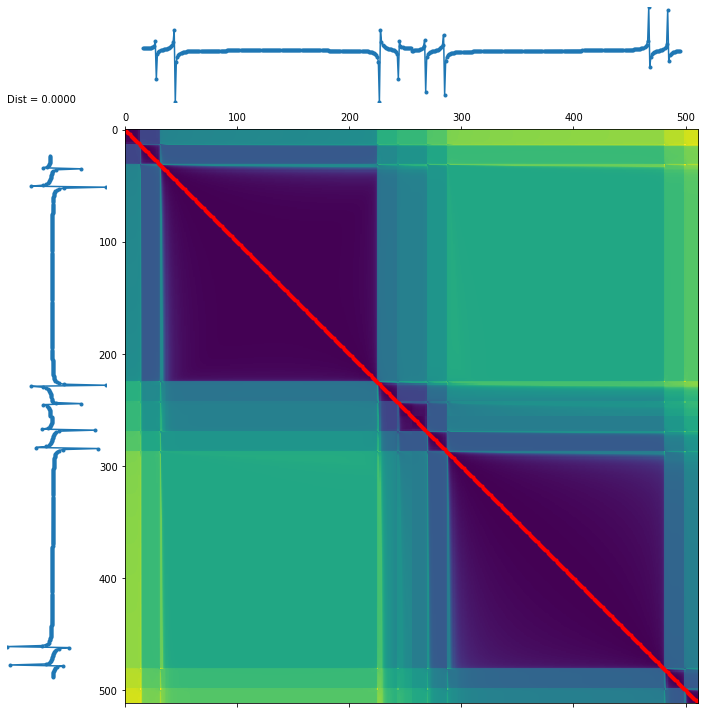

In [8]:
s1 = np.array(dataSet1)
s2 = np.array(dataSet2)

distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

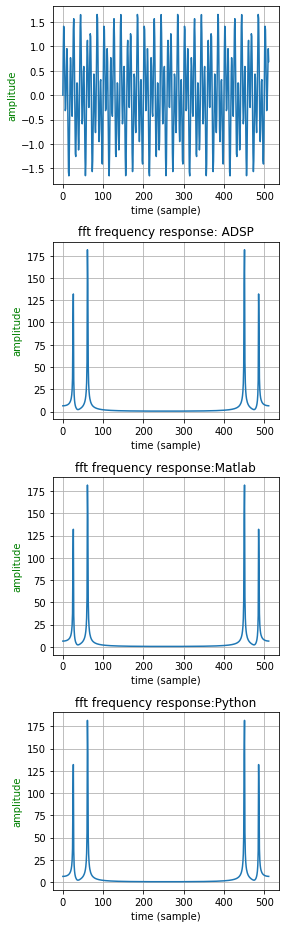

In [9]:
# we need imaginary part in time domain while ADSP is processing
# but remobe imaginary part of data now
# so we can analysis 
dataSet0 = read_data("FFT_Data/inputcomplx512.dat")
dataSet0 = dataSet0[0::2]
x_axis0 = np.arange(len(dataSet0))

dataSet1 = read_data("FFT_Data/FFT512complx_ADSP.dat")
x_axis1 = np.arange(len(dataSet1)//2)
complx1 = np.zeros(len(dataSet1)//2, complex)
complx1.real = dataSet1[1::2]
complx1.imag = dataSet1[0::2]

dataSet2 = read_data("FFT_Data/FFT512complx_Matlab.dat")
x_axis2 = np.arange(len(dataSet2)//2)
complx2 = np.zeros(len(dataSet2)//2, complex)
complx2.real = dataSet2[1::2]
complx2.imag = dataSet2[0::2]

dataSet3 = cooley_tukey_fft(dataSet0)
x_axis3 = np.arange(len(dataSet3))

fig, axes = plt.subplots(4, 1, figsize=(4, 13))

axes[0].plot(x_axis0, dataSet0)
axes[0].set_xlabel('time (sample)')
axes[0].set_ylabel('amplitude', color='g')
axes[0].grid()

axes[1].plot(x_axis1, abs(complx1))
axes[1].set_title('fft frequency response: ADSP')
axes[1].set_xlabel('time (sample)')
axes[1].set_ylabel('amplitude', color='g')
axes[1].grid()

axes[2].plot(x_axis2, abs(complx2))
axes[2].set_title('fft frequency response:Matlab')
axes[2].set_xlabel('time (sample)')
axes[2].set_ylabel('amplitude', color='g')
axes[2].grid()

axes[3].plot(x_axis3, abs(dataSet3))
axes[3].set_title('fft frequency response:Python')
axes[3].set_xlabel('time (sample)')
axes[3].set_ylabel('amplitude', color='g')
axes[3].grid()

plt.tight_layout()
plt.show()

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

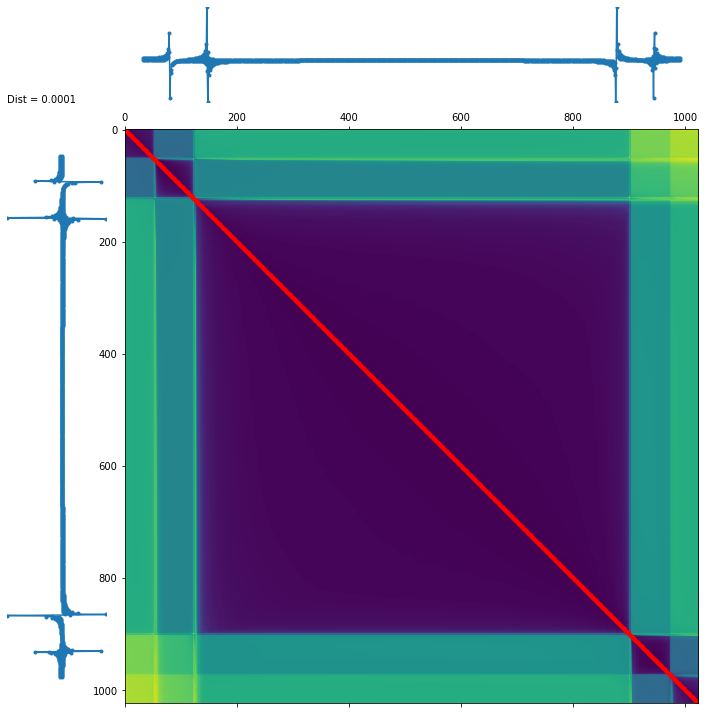

In [10]:
s1 = np.array(dataSet1)
s2 = np.array(dataSet2)

distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

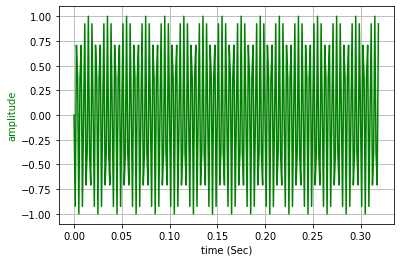

In [11]:
### Number of sample points
N = 256
# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(550.0 * 2.0*np.pi*x)

fig, ax1 = plt.subplots()

ax1.plot(x, y, 'g')
ax1.set_xlabel(r'time (Sec)')
ax1.set_ylabel('amplitude', color='g')
ax1.grid()
plt.show()

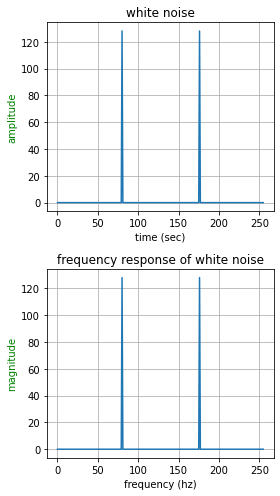

In [12]:
yy1 = recursive_fft(y)
yy1 = np.array(yy1)
xy1 = np.arange(len(yy1))
half = len(yy1) // 2

yy2 = cooley_tukey_fft(y)
xy2 = np.arange(len(yy2))
half = len(yy2) // 2

fig, axes = plt.subplots(2, 1, figsize=(4, 7))

axes[0].plot(xy1, abs(yy1))
axes[0].set_xlabel('time (sec)')
axes[0].set_ylabel('amplitude', color='g')
axes[0].set_title('white noise')
axes[0].grid()

axes[1].plot(xy2, abs(yy2))
axes[1].set_title('frequency response of white noise')
axes[1].set_xlabel('frequency (hz)')
axes[1].set_ylabel('magnitude', color='g')
axes[1].grid()

plt.tight_layout()
plt.show()

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

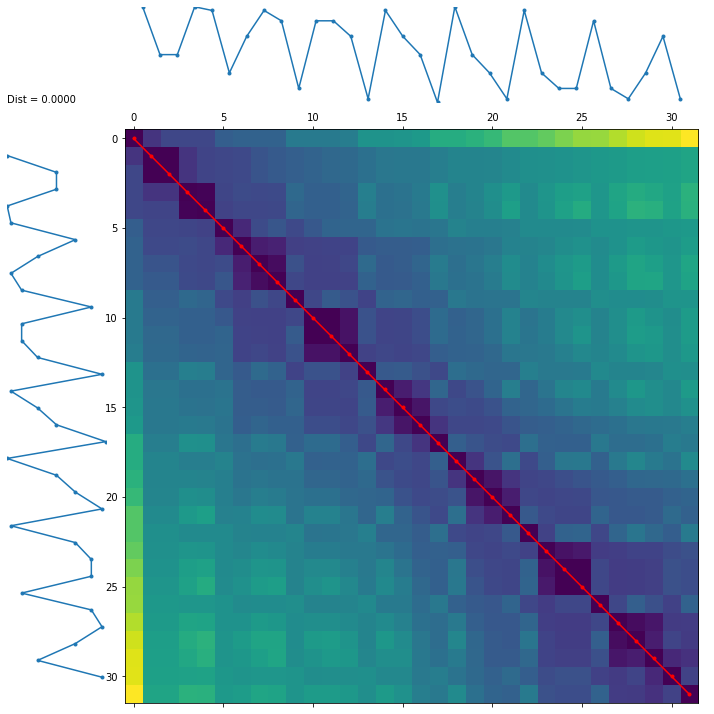

In [13]:
dataSet1 = read_data("../FFT/twiddle16complx.dat")
dataSet2 = read_data("../../../Projects/ADSP-21479_EZKIT-Rel1.0.0/21479_EZ-Board/Examples/512_Point_FFT/src/twiddle16complx.dat")


s1 = np.array(dataSet1)
s2 = np.array(dataSet2)

distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

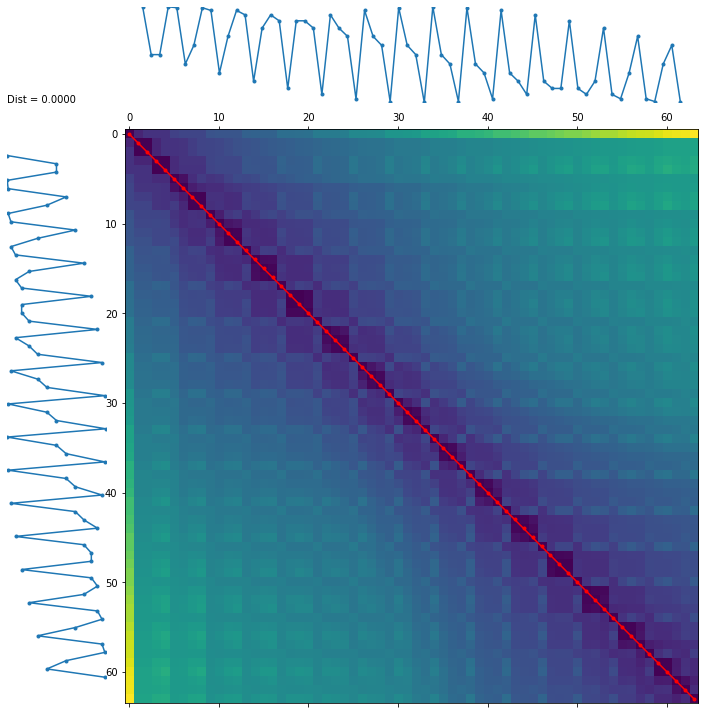

In [14]:
dataSet1 = read_data("../FFT/twiddle32complx.dat")
dataSet2 = read_data("../../../Projects/ADSP-21479_EZKIT-Rel1.0.0/21479_EZ-Board/Examples/512_Point_FFT/src/twiddle32complx.dat")


s1 = np.array(dataSet1)
s2 = np.array(dataSet2)

distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

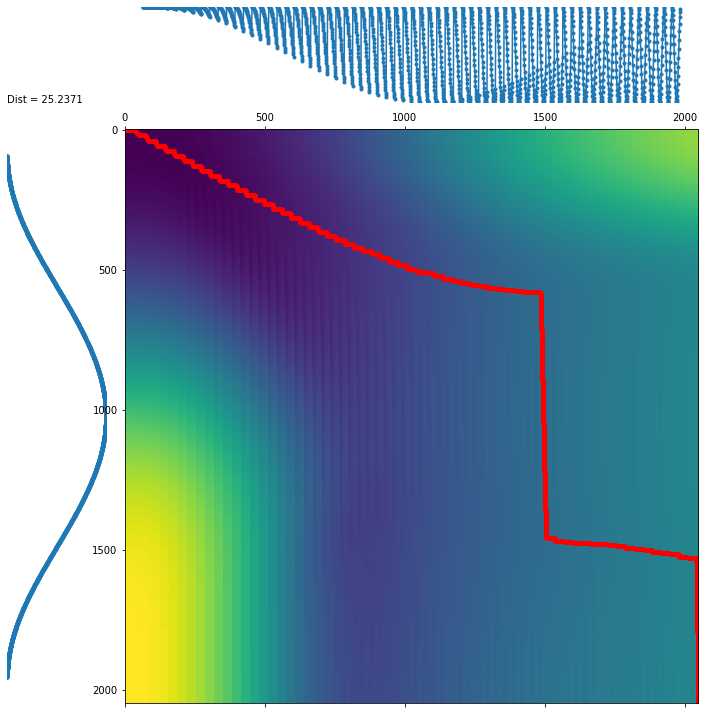

In [23]:
dataSet1 = read_data("../FFT/SpecialTwiddles8192.dat")
# dataSet2 = read_data("../FFT/SpecialTwiddles8192.dat")
dataSet2 = read_data("../../../Projects/FFTA/pw_twiddle_2048.dat")

s1 = np.array(dataSet1[::4])
s2 = np.array(dataSet2[::4])

distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [16]:
a = [1,2,3,4,5,6,7,8]
a[::4]

[1, 5]